In [1]:
# 目的: 生成兩種影像投影類型(Z軸最大值、Z軸加總)，並將資料切分成 Trainset valset Testingset

In [4]:
# Step1 先讀取目前所有的 AL imagel & label(txt)
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import shutil
import time
import random
YOLO_txt_src = "Neuron_image_and_label/AL_only_txt/"
YOLO_img_src = "Neuron_image_and_label/AL_only_image/"
txt_src_files = os.listdir(YOLO_txt_src)
YOLO_img_files = os.listdir(YOLO_img_src)
print('AL.txt 總共數量: ',len(txt_src_files))
print('AL.img 總共數量: ',len(YOLO_img_files))

AL.txt 總共數量:  473
AL.img 總共數量:  473


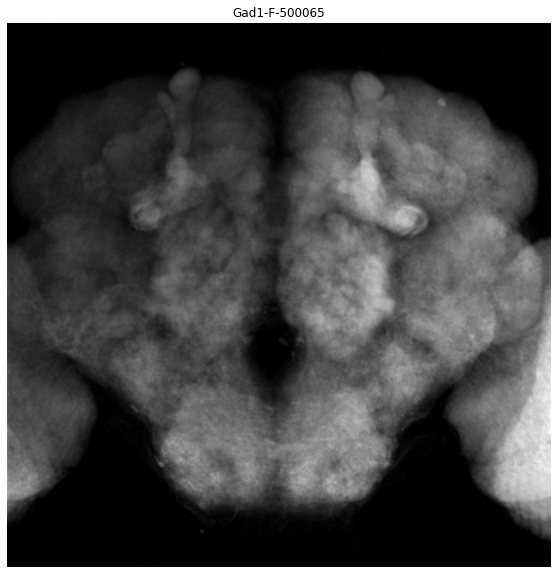

In [5]:
# Step1_1 顯示目前現有的2D投影圖
# 讀取要展示的圖片
img = cv2.imread(YOLO_img_src+YOLO_img_files[0])
# 設定圖片大小
plt.figure(figsize=(10,10))
# 顯示圖片(灰階)
plt.imshow(img, cmap='gray')
# 不顯示座標軸
plt.axis('off')
# 設定圖片標題
plt.title(YOLO_img_files[0][:-4])
plt.show()

Brains 總共數量:  28573
原本shape:  (1024, 1024, 109)
置換後shape:  (109, 1024, 1024)


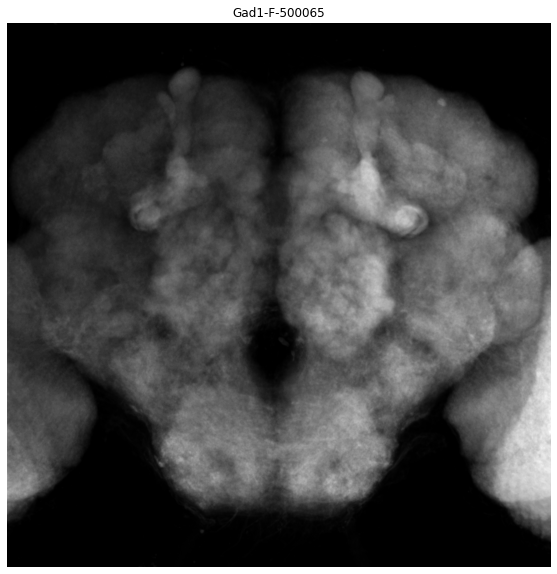

In [6]:
# Step2_0 生成兩總投影圖(max & sum) 因之前只用Z軸加總圖 ===============先做圖展示
# 讀取NAS中的npy (YOLO_img_files[0][:-4]+'.npy')
All_brain_npy_src = "/mnt/nas_1/LoLab/kaiyi_hsu/Ouput_from_Amira/npy_files/"
All_brain_files = os.listdir(All_brain_npy_src)
print('Brains 總共數量: ',len(All_brain_files))
NPY = np.load(All_brain_npy_src+YOLO_img_files[0][:-4]+'.npy')
# 將NPY轉成(??, 1024, 1024)
print('原本shape: ',NPY.shape)
# 需要置換兩次
# 第一次先將1024,1024互換
NPY = np.transpose(NPY, (1, 0, 2))
NPY = np.transpose(NPY, (2, 0, 1))
print('置換後shape: ',NPY.shape)
projection = np.sum(NPY, axis=0) # 取加總值
# 設定圖片大小
plt.figure(figsize=(10,10))
# 顯示圖片(灰階)
plt.imshow(projection, cmap='gray')
# 不顯示座標軸
plt.axis('off')
# 設定圖片標題
plt.title(YOLO_img_files[0][:-4])
plt.show()

In [7]:
# Step2_1 批量輸出 Zmax & Zsum圖片至 正式版_AL_only_image_Zmax_Zsum ，同時複製對應的txt 至 正式版_AL_only_txt_Zmax_Zsum
# 記錄開始時間
start_time = time.time()
# 設定大腦npy檔案路徑 All_brain_npy_src
All_brain_npy_src = "/mnt/nas_1/LoLab/kaiyi_hsu/Ouput_from_Amira/npy_files/"
All_brain_files = os.listdir(All_brain_npy_src)
print('Brains 總共數量: ',len(All_brain_files))
# 設定需複製的txt檔案路徑 YOLO_txt_src
YOLO_txt_src = "Neuron_image_and_label/AL_only_txt/"
txt_src_files = os.listdir(YOLO_txt_src)
print('AL.txt 總共數量: ',len(txt_src_files))
# 設定輸出圖片路徑
output_image_path = "Neuron_image_and_label/正式版_AL_only_image_Zmax_Zsum/"
# 設定輸出txt路徑
output_txt_path = "Neuron_image_and_label/正式版_AL_only_txt_Zmax_Zsum/"
# 批量讀取npy檔案，並在迴圈中進行輸出兩個版本的圖片
for i in range(len(txt_src_files)):
    NPY = np.load(All_brain_npy_src+YOLO_img_files[i][:-4]+'.npy')
    # 需要置換兩次
    NPY = np.transpose(NPY, (1, 0, 2))
    NPY = np.transpose(NPY, (2, 0, 1))
    # ===============
    # 第一步: 輸出Zsum圖片
    projection = np.sum(NPY, axis=0) # 取加總值
    # 將projection輸出成圖片(png)，並存至output_image_path
    plt.imsave(output_image_path+YOLO_img_files[i][:-4]+'_Zsum.png', projection, cmap='gray')
    # 同時複製對應的txt 至 output_txt_path(需要增加_Zsum在檔案名稱中)
    shutil.copy(YOLO_txt_src+YOLO_img_files[i][:-4]+'.txt', output_txt_path+YOLO_img_files[i][:-4]+'_Zsum.txt')
    # ===============
    # 第二步: 輸出Zmax圖片
    projection = np.max(NPY, axis=0) # 取最大值
    # 將projection輸出成圖片(png)，並存至output_image_path
    plt.imsave(output_image_path+YOLO_img_files[i][:-4]+'_Zmax.png', projection, cmap='gray')
    # 同時複製對應的txt 至 output_txt_path(需要增加_Zmax在檔案名稱中)
    shutil.copy(YOLO_txt_src+YOLO_img_files[i][:-4]+'.txt', output_txt_path+YOLO_img_files[i][:-4]+'_Zmax.txt')
    # ===============
    print('已完成: ',i+1,'/',len(txt_src_files))
# 檢查輸出路徑內檔案數量是否正確
print('輸出路徑內檔案數量: ',len(os.listdir(output_image_path)))
print('輸出路徑內檔案數量: ',len(os.listdir(output_txt_path)))
# 記錄結束時間
end_time = time.time()
# 計算運行時間
run_time = end_time - start_time
print("Total run time: ", run_time, "seconds")

Brains 總共數量:  28573
AL.txt 總共數量:  473
已完成:  1 / 473
已完成:  2 / 473
已完成:  3 / 473
已完成:  4 / 473
已完成:  5 / 473
已完成:  6 / 473
已完成:  7 / 473
已完成:  8 / 473
已完成:  9 / 473
已完成:  10 / 473
已完成:  11 / 473
已完成:  12 / 473
已完成:  13 / 473
已完成:  14 / 473
已完成:  15 / 473
已完成:  16 / 473
已完成:  17 / 473
已完成:  18 / 473
已完成:  19 / 473
已完成:  20 / 473
已完成:  21 / 473
已完成:  22 / 473
已完成:  23 / 473
已完成:  24 / 473
已完成:  25 / 473
已完成:  26 / 473
已完成:  27 / 473
已完成:  28 / 473
已完成:  29 / 473
已完成:  30 / 473
已完成:  31 / 473
已完成:  32 / 473
已完成:  33 / 473
已完成:  34 / 473
已完成:  35 / 473
已完成:  36 / 473
已完成:  37 / 473
已完成:  38 / 473
已完成:  39 / 473
已完成:  40 / 473
已完成:  41 / 473
已完成:  42 / 473
已完成:  43 / 473
已完成:  44 / 473
已完成:  45 / 473
已完成:  46 / 473
已完成:  47 / 473
已完成:  48 / 473
已完成:  49 / 473
已完成:  50 / 473
已完成:  51 / 473
已完成:  52 / 473
已完成:  53 / 473
已完成:  54 / 473
已完成:  55 / 473
已完成:  56 / 473
已完成:  57 / 473
已完成:  58 / 473
已完成:  59 / 473
已完成:  60 / 473
已完成:  61 / 473
已完成:  62 / 473
已完成:  63 / 473
已完成:  64 / 473
已完成:  65 / 

In [8]:
# Step3_0 先刪除先前的資料夾
!rm -r Neuron_image_and_label/labels/
!rm -r Neuron_image_and_label/images/
!mkdir 'Neuron_image_and_label/labels/'
!mkdir 'Neuron_image_and_label/images/'
!mkdir 'Neuron_image_and_label/labels/train'
!mkdir 'Neuron_image_and_label/images/train'
!mkdir 'Neuron_image_and_label/labels/val'
!mkdir 'Neuron_image_and_label/images/val'

In [9]:
# Step3_1 隨機打亂946 將 757 個複製到訓練，將 189 個複製到val驗證
import random
import shutil
a = np.arange(946)
random.shuffle(a)
src_files = np.array(os.listdir(output_txt_path))
src_files = src_files[a]
# 以上完成隨機打亂 946 個檔案
for i in range(len(src_files)):
    if i<757:
        # 複製檔案至訓練資料夾 先複製 YOLO.txt
        shutil.copy(output_txt_path+src_files[i], 'Neuron_image_and_label/labels/train')
        # 複製檔案至訓練資料夾 再複製 圖片
        shutil.copy(output_image_path+src_files[i][:-4]+'.png', 'Neuron_image_and_label/images/train')
    else:
        # 複製檔案至訓練資料夾 先複製 YOLO.txt
        shutil.copy(output_txt_path+src_files[i], 'Neuron_image_and_label/labels/val')
        # 複製檔案至訓練資料夾 再複製 圖片
        shutil.copy(output_image_path+src_files[i][:-4]+'.png', 'Neuron_image_and_label/images/val')